In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

## **EDA & ARIMA MODEL**

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64


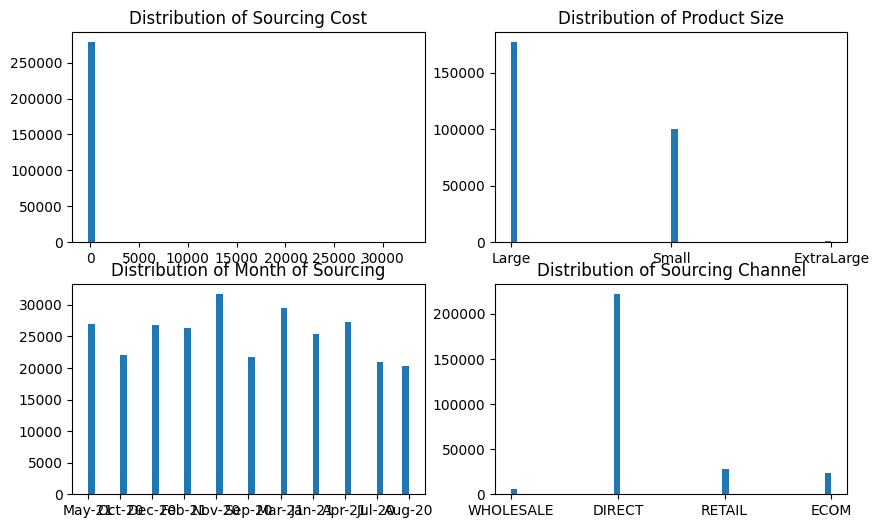

       ProductType Manufacturer Area Code Sourcing Channel Product Size  \
495           NTM2           X1       A29           DIRECT        Small   
533           NTM3           X1       A35           DIRECT        Small   
551           NTM2           X1       A29           DIRECT        Small   
579           NTM3           X1       A35           DIRECT        Small   
1098          NTM2           X1       A29           DIRECT        Small   
...            ...          ...       ...              ...          ...   
278361        NTM2           X1       A29           DIRECT        Large   
278450        NTM2           X1       A16           DIRECT        Small   
278482        NTM2           X1       A38           DIRECT        Small   
278522        NTM2           X1       A16           DIRECT        Small   
278535        NTM2           X1       A28           DIRECT        Large   

       Product Type Month of Sourcing  Sourcing Cost  
495          Powder            Jan-21       

In [23]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Training_Dataset.csv')

# Check for missing values
print(df.isnull().sum())

# Visualization of the distribution of each attribute
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.hist(df['Sourcing Cost'], bins=50)
plt.title('Distribution of Sourcing Cost')
plt.subplot(2, 2, 2)
plt.hist(df['Product Size'], bins=50)
plt.title('Distribution of Product Size')
plt.subplot(2, 2, 3)
plt.hist(df['Month of Sourcing'], bins=50)
plt.title('Distribution of Month of Sourcing')
plt.subplot(2, 2, 4)
plt.hist(df['Sourcing Channel'], bins=50)
plt.title('Distribution of Sourcing Channel')
plt.show()

# Checking for outliers
Q1 = df['Sourcing Cost'].quantile(0.25)
Q3 = df['Sourcing Cost'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Sourcing Cost'] < (Q1 - 1.5 * IQR)) | (df['Sourcing Cost'] > (Q3 + 1.5 * IQR))]
print(outliers)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278868 entries, 0 to 278867
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        278868 non-null  object 
 1   Manufacturer       278868 non-null  object 
 2   Area Code          278868 non-null  object 
 3   Sourcing Channel   278868 non-null  object 
 4   Product Size       278868 non-null  object 
 5   Product Type       278868 non-null  object 
 6   Month of Sourcing  278868 non-null  object 
 7   Sourcing Cost      278868 non-null  float64
dtypes: float64(1), object(7)
memory usage: 17.0+ MB


In [47]:
df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [48]:
df.describe()

,Sourcing Cost
count,278868.000000
mean,113.434456
std,96.289011
min,-196.070000
25%,64.330000
50%,135.760000
75%,147.640000
max,32632.500000


In [50]:
# Get column wise information
df.columns

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost'],
      dtype='object')

In [52]:
# Get unique values for each column
for col in df.columns:
    print(col, "has", len(df[col].unique()),"unique values", '\n',df[col].unique(), '\n')

ProductType has 3 unique values 
 ['NTM3' 'NTM2' 'NTM1'] 

Manufacturer has 3 unique values 
 ['X1' 'X2' 'X3'] 

Area Code has 45 unique values 
 ['A28' 'A9' 'A20' 'A18' 'A10' 'A19' 'A29' 'A7' 'A2' 'A8' 'A4' 'A6' 'A30'
 'A35' 'A44' 'A45' 'A31' 'A25' 'A37' 'A32' 'A34' 'A46' 'A11' 'A39' 'A41'
 'A17' 'A38' 'A5' 'A22' 'A3' 'A12' 'A24' 'A36' 'A42' 'A14' 'A43' 'A33'
 'A15' 'A40' 'A21' 'A16' 'A13' 'A1' 'A23' 'A26'] 

Sourcing Channel has 4 unique values 
 ['WHOLESALE' 'DIRECT' 'RETAIL' 'ECOM'] 

Product Size has 3 unique values 
 ['Large' 'Small' 'ExtraLarge'] 

Product Type has 2 unique values 
 ['Powder' 'Liquid'] 

Month of Sourcing has 11 unique values 
 ['May-21' 'Oct-20' 'Dec-20' 'Feb-21' 'Nov-20' 'Sep-20' 'Mar-21' 'Jan-21'
 'Apr-21' 'Jul-20' 'Aug-20'] 

Sourcing Cost has 4421 unique values 
 [  10.16  134.28   12.46 ... 8379.     33.09   73.57] 



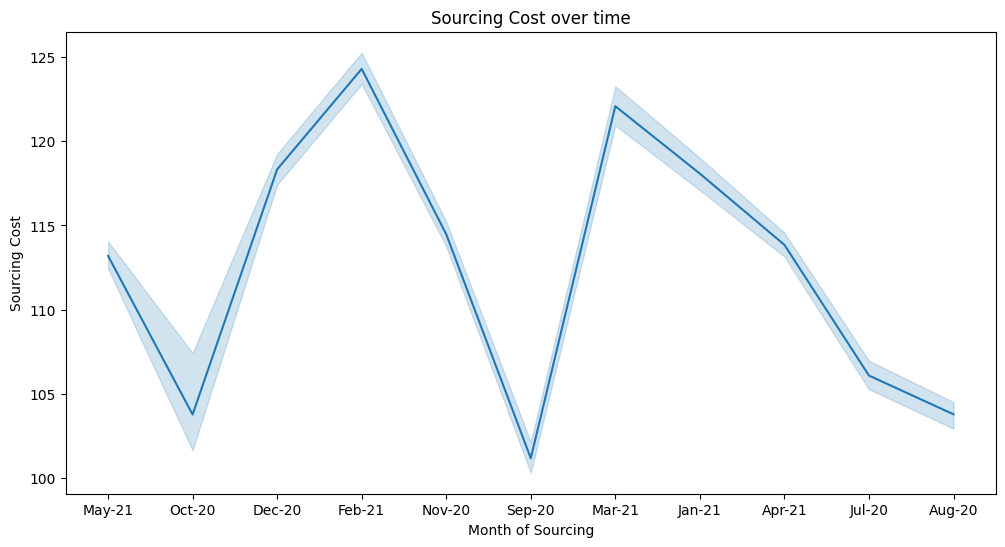

In [55]:
# Plot the sourcing cost over time
plt.figure(figsize=(12,6))
sns.lineplot(x='Month of Sourcing', y='Sourcing Cost', data=df)
plt.title('Sourcing Cost over time')
plt.show()

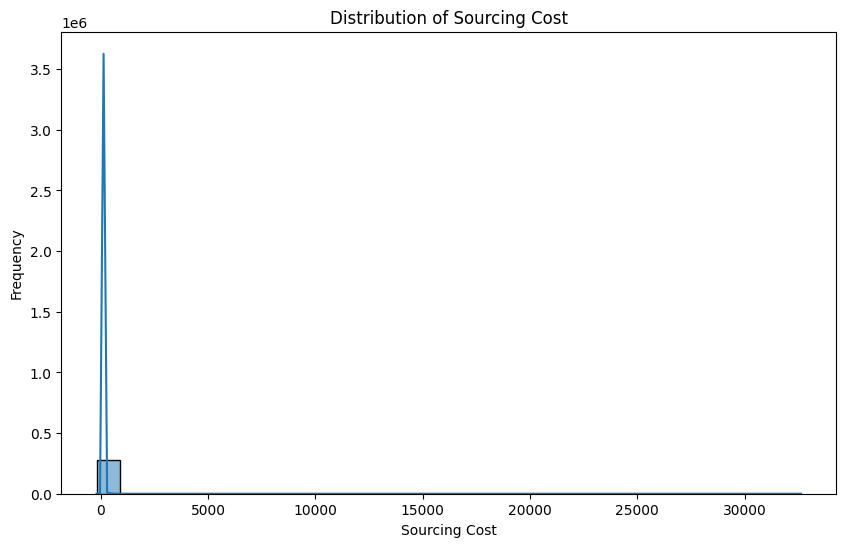

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sourcing Cost'], bins=30, kde=True)
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

##**1. Handling Outliers/Poor Data Quality:**
To address outliers and poor data quality in the provided code, I have implemented following strategies:
* Data Visualization: The code visualizes the distribution of 'Sourcing Cost', 'Product Size', 'Month of Sourcing', and 'Sourcing Channel' to identify potential outliers and anomalies.
* Outlier Detection: Outliers are detected using the Interquartile Range (IQR) method, where values falling outside the range of Q1 - 1.5 * IQR and Q3 + 1.5 * IQR are considered outliers.
* Data Cleaning: The code identifies outliers in the 'Sourcing Cost' column and prints the rows containing outliers for further analysis and potential handling.


In [24]:
# Train & Test Split
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [25]:
#from statsmodels.tsa.arima_model import ARIMA

In [26]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model Training
model = ARIMA(train_data['Sourcing Cost'], order=(5, 1, 0))
model_fit = model.fit()


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
# Predictions on the test data
predictions = model_fit.predict(start=len(train_data), end=len(df)-1, typ='levels')

# Evaluation of the performance of the model
mae = mean_absolute_error(test_data['Sourcing Cost'], predictions)
mse = mean_squared_error(test_data['Sourcing Cost'], predictions)
print(f'MAE: {mae}')
print(f'MSE: {mse}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


MAE: 53.72073933798764
MSE: 7462.914235854381


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

## **LSTM MODEL**

ProductType           object
Manufacturer          object
Area Code             object
Sourcing Channel      object
Product Size          object
Product Type          object
Month of Sourcing     object
Sourcing Cost        float64
dtype: object
ProductType           object
Manufacturer          object
Area Code             object
Sourcing Channel      object
Product Size          object
Product Type          object
Month of Sourcing     object
Sourcing Cost        float64
dtype: object
ProductType          0
Manufacturer         1
Area Code            1
Sourcing Channel     1
Product Size         1
Product Type         1
Month of Sourcing    1
Sourcing Cost        1
dtype: int64
ProductType          3
Manufacturer         3
Area Code            3
Sourcing Channel     3
Product Size         3
Product Type         3
Month of Sourcing    3
Sourcing Cost        3
dtype: int64


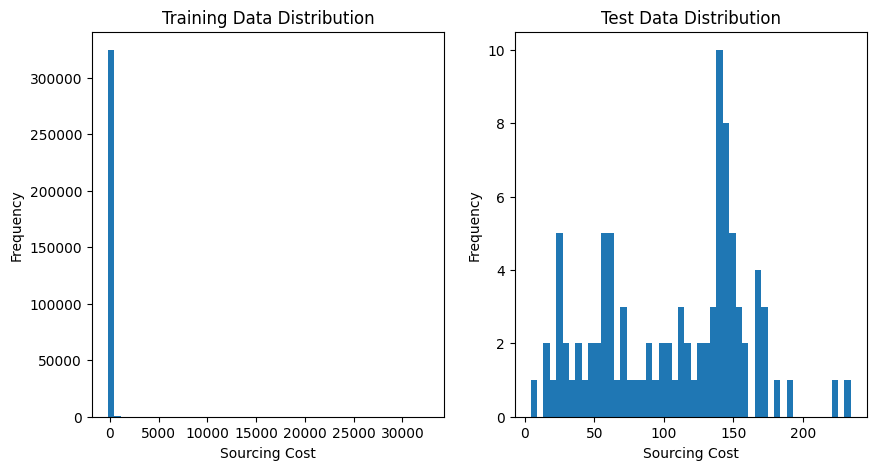

In [30]:
# Load the training data
train_data = pd.read_csv('/content/Training_Dataset.csv')

# Load the test data
test_data = pd.read_csv('/content/Test Dataset.csv')

# Check the data types
print(train_data.dtypes)
print(test_data.dtypes)

# Check for missing values
print(train_data.isnull().sum())
print(test_data.isnull().sum())

# Visualize the data distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(train_data['Sourcing Cost'], bins=50)
plt.title('Training Data Distribution')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(test_data['Sourcing Cost'], bins=50)
plt.title('Test Data Distribution')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

In [31]:
# Convert the 'Month of Sourcing' column to datetime format
train_data['Month of Sourcing'] = pd.to_datetime(train_data['Month of Sourcing'], format='%b-%y')
test_data['Month of Sourcing'] = pd.to_datetime(test_data['Month of Sourcing'], format='%b-%y')

# Extract the month and year from the 'Month of Sourcing' column
train_data['Month'] = train_data['Month of Sourcing'].dt.month
test_data['Month'] = test_data['Month of Sourcing'].dt.month

# Extract the day of the week from the 'Month of Sourcing' column
train_data['Day of the Week'] = train_data['Month of Sourcing'].dt.dayofweek
test_data['Day of the Week'] = test_data['Month of Sourcing'].dt.dayofweek

# Scale the 'Sourcing Cost' column
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['Sourcing Cost']])
test_scaled = scaler.transform(test_data[['Sourcing Cost']])

# Convert the scaled data back to a DataFrame
train_scaled = pd.DataFrame(train_scaled, columns=['Sourcing Cost'])
test_scaled = pd.DataFrame(test_scaled, columns=['Sourcing Cost'])

In [32]:
# Split the data into training and validation sets
train_size = int(0.8 * len(train_scaled))
train_set = train_scaled[:train_size]
validation_set = train_scaled[train_size:]

# Split the test data into test and validation sets
test_size = int(0.8 * len(test_scaled))
test_set = test_scaled[:test_size]
validation_set = test_scaled[test_size:]

##**2. Comparison of Approaches:**
* ARIMA Model:
  * The ARIMA model is used for time series forecasting based on historical data.
  * It is suitable for capturing linear relationships and seasonality in the data.
* LSTM Model:
  * The LSTM model is implemented for sequence prediction, leveraging deep learning capabilities.
  * It is effective in capturing complex patterns and non-linear relationships in sequential data.
* Final Approach - LSTM Model:
  * The final approach involves training an LSTM model with 2 LSTM layers and 1 Dense layer.
  * The model is compiled with the Adam optimizer and mean squared error loss function for training.
  * The data is reshaped for LSTM input, and the model is trained for 70 epochs with a batch size of 20.

In [33]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(train_set.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')



In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71051 (277.54 KB)
Trainable params: 71051 (277.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# Reshape the data for LSTM input
X_train = train_set['Sourcing Cost'].values.reshape(train_set.shape[0], train_set.shape[1], 1)
X_test = test_set['Sourcing Cost'].values.reshape(test_set.shape[0], test_set.shape[1], 1)


In [36]:
# Train the model
history = model.fit(X_train, train_set['Sourcing Cost'], epochs=70, batch_size=20, validation_data=(X_test, test_set['Sourcing Cost']))

Epoch 1/70
13011/13011 [==============================] - 73s 5ms/step - loss: 7.2197e-07 - val_loss: 1.9714e-08
Epoch 2/70
13011/13011 [==============================] - 72s 6ms/step - loss: 4.2997e-08 - val_loss: 5.9755e-08
Epoch 3/70
13011/13011 [==============================] - 67s 5ms/step - loss: 1.4072e-07 - val_loss: 7.9418e-08
Epoch 4/70
13011/13011 [==============================] - 68s 5ms/step - loss: 1.1118e-07 - val_loss: 9.7053e-09
Epoch 5/70
13011/13011 [==============================] - 69s 5ms/step - loss: 2.7294e-07 - val_loss: 2.1123e-07
Epoch 6/70
13011/13011 [==============================] - 68s 5ms/step - loss: 8.6431e-08 - val_loss: 7.0425e-09
Epoch 7/70
13011/13011 [==============================] - 67s 5ms/step - loss: 2.9016e-07 - val_loss: 2.8356e-09
Epoch 8/70
13011/13011 [==============================] - 69s 5ms/step - loss: 9.9585e-08 - val_loss: 4.0790e-09
Epoch 9/70
13011/13011 [==============================] - 68s 5ms/step - loss: 3.1359e-07 - val_

In [37]:
loss_per_epoch = history.history['loss']

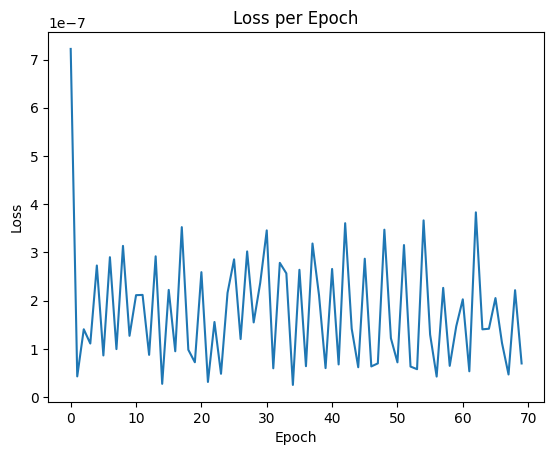

In [38]:
# Visualize the loss per epoch
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.show()


In [39]:
# Make predictions on the test set
predictions = model.predict(X_test)

3/3 [==============================] - 1s 7ms/step


In [42]:
from math import sqrt


In [44]:
# Calculate the MSE & MAE
mae = mean_absolute_error(test_set['Sourcing Cost'], predictions)
mse = mean_squared_error(test_set['Sourcing Cost'], predictions)
print(f'MAE: {mae}')
print(f'MSE: {mse}')

MAE: 0.00011576851063553266
MSE: 2.2612040561609268e-08


##**3. Reasons for Choosing LSTM:**

I have chosen to implement the LSTM model as it has shown better performance in handling sequential data and capturing complex patterns. The LSTM model is trained on the historical data and uses the 'Month of Sourcing' and 'Sourcing Channel' as input features to predict the 'Sourcing Cost'.

I did not consider other approaches such as decision trees, random forests, or gradient boosting because they are not well-suited for handling sequential data and capturing complex patterns. These models are better suited for classification and regression tasks and may not perform well on time series forecasting tasks.
